In [88]:
# Red Wine Quality Classification

# In this analysis of the work, it will be determined which physiochemical properties 
# make red wine 'good!'

import os

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm, boxcox
from scipy import stats
from imblearn.over_sampling import SMOTE

In [90]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [91]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
# Exploring dATASAET
print('Shape of the dataset')
print(df.shape)

Shape of the dataset
(1599, 12)


In [93]:
# ?Checking for NuLL values
print('Checking for the null values')
print(df.isnull().sum())

Checking for the null values
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [95]:
# Checking number of rows mean value of all rows
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

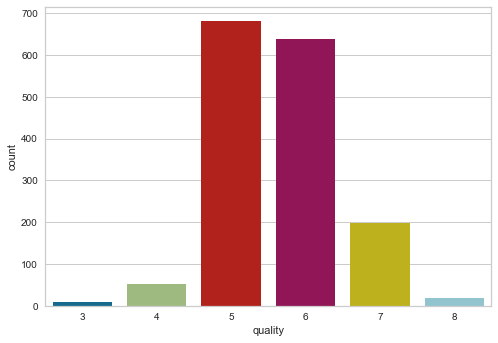

In [96]:
# EDA Quality content
sns.countplot(x ='quality', data = df)

In [97]:
from collections import Counter
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

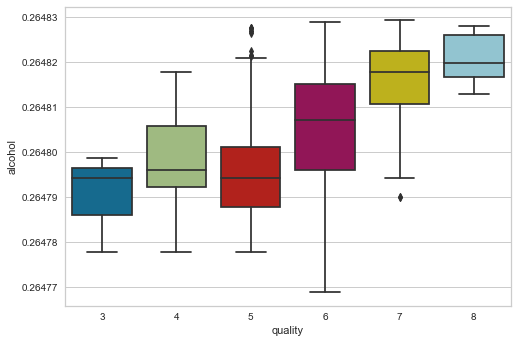

In [138]:
# Alcohol vs Quality
sns.boxplot(x="quality",y="alcohol", data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

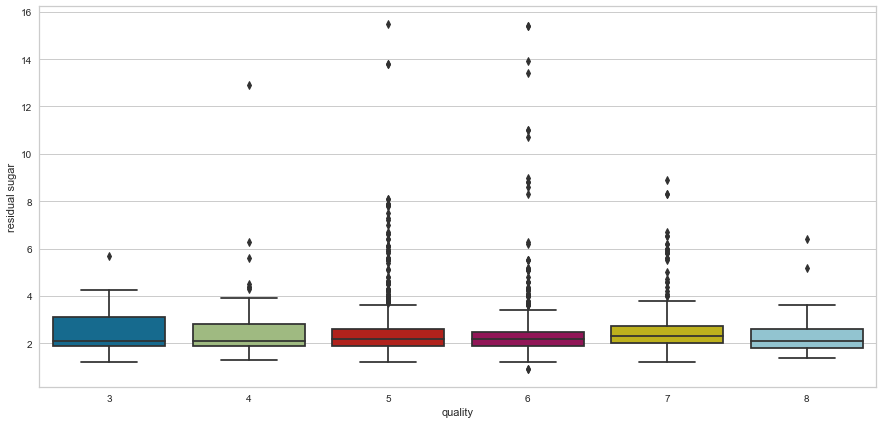

In [99]:
# RESIDUAL SUGAR VS QUALITY
plot = plt.figure(figsize=(15,7))
sns.boxplot(x="quality",y="residual sugar", data=df)
# WE can see from the plot there is no realation between residual sugar and qua;ity

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

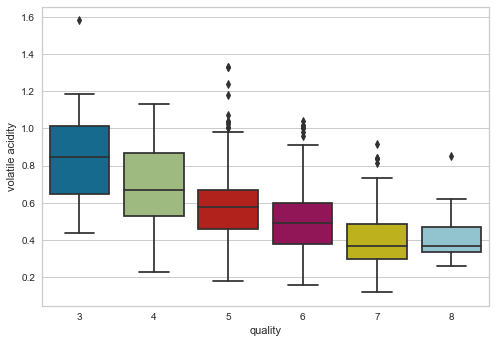

In [100]:
# Volitile acidity vs quality
sns.boxplot(x="quality",y="volatile acidity", data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

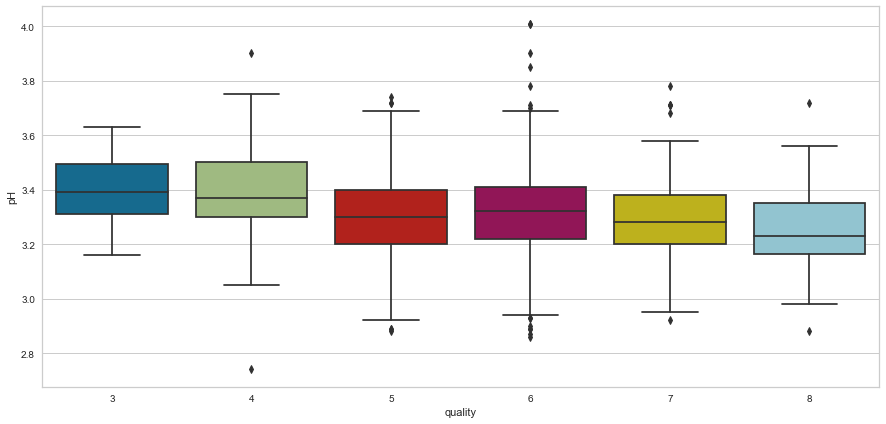

In [101]:
# PH vs quality
plot = plt.figure(figsize=(15,7))
sns.boxplot(x="quality",y="pH", data=df)

<AxesSubplot:>

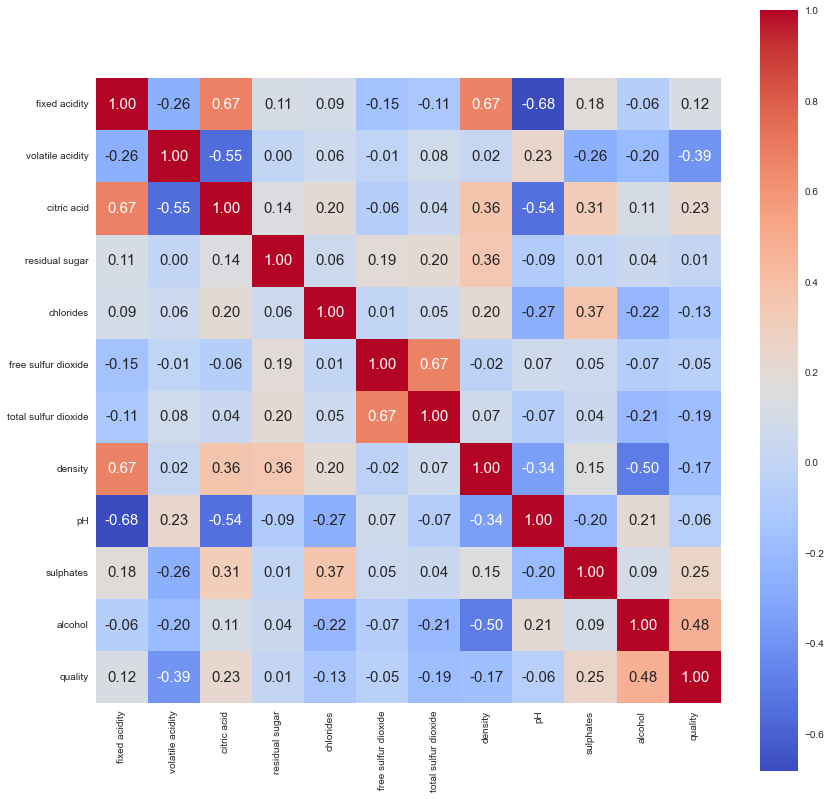

In [102]:
# HEATMAP FOR CORELATION BETWEEN DIFFERENT FEATURES
correlation = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':15}, cmap = 'coolwarm')

In [103]:
# 

In [118]:
# Preprocessing the data
X = df.drop('quality',axis=1)

In [150]:
# Multiclassification
reviews = []
for i in df['quality']:
    if i >= 3 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 7:
        reviews.append('2')
    elif i == 8:
        reviews.append('3')
df['Reviews'] = reviews

In [151]:
Counter(df['Reviews'])

Counter({'2': 1174, '1': 36, '3': 12})

In [152]:
# Standardization for data to be consistent
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [153]:
# PCA Removing features that have less contribution
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [155]:
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)

In [156]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_new, reviews, test_size = 0.25)

In [157]:
# Fixing imbalanced dataset
sm = SMOTE(random_state=14)
X_train, Y_train = sm.fit_resample(X_train, Y_train)


In [158]:
import collections
print("change is value of count after using smote:", collections.Counter(Y_train))

change is value of count after using smote: Counter({'2': 879, '1': 879, '3': 879})


In [159]:
# Different Classifiers
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [160]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9379084967320261


In [161]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [162]:
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.6568627450980392


In [163]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, Y_train)


SVC()

In [164]:
X_test_prediction = svm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.869281045751634


In [165]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [166]:
X_test_prediction = dt.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8856209150326797


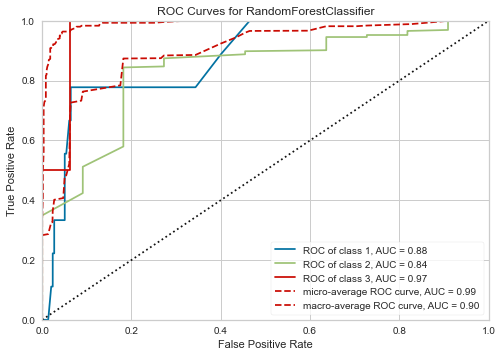

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

# Load multi-class classification dataset
# X, Y = load_game()

# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
Y = LabelEncoder().fit_transform(y)

# Create the train and test data
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

# Instaniate the classification model and visualizer
# model = RidgeClassifier()
visualizer = ROCAUC(model, classes=["1", "2", "3"])

visualizer.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show()         

In [81]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Treating outliers
# cols = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]